<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/ImageProcessing_opencv_yolov5_pretrauned_image_model_restnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image classification with prebuilt models

In [1]:
import torch
import torchvision
model = torchvision.models.resnext50_32x4d(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

Imagenet lables

In [2]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2021-08-10 07:08:36--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2021-08-10 07:08:36 (85.9 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [3]:
import urllib

url,filename = ("https://scx2.b-cdn.net/gfx/news/hires/2018/2-dog.jpg","Dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [4]:
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


In [6]:
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

In [7]:
with torch.no_grad():
    output = model(input_batch)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [8]:
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([3.2400e-05, 2.9866e-05, 4.1495e-06, 4.1334e-06, 8.8161e-06, 2.2061e-05,
        4.8766e-06, 3.2739e-05, 1.1632e-04, 2.3625e-05, 7.4579e-05, 7.1247e-05,
        4.5445e-05, 3.3874e-05, 2.8826e-04, 1.3213e-05, 1.1480e-05, 3.0140e-05,
        1.7966e-05, 1.1544e-05, 1.6129e-05, 1.4033e-05, 1.0663e-05, 9.5382e-05,
        3.0611e-05, 1.6643e-04, 2.1335e-05, 3.0993e-05, 3.2339e-05, 1.0854e-05,
        1.2113e-05, 1.3873e-05, 1.6962e-05, 9.7016e-06, 5.8245e-05, 3.7891e-05,
        2.6862e-05, 5.9389e-05, 1.5805e-05, 1.9478e-05, 9.2065e-06, 3.0256e-05,
        4.3983e-05, 5.7764e-06, 5.4834e-05, 4.8790e-05, 2.4069e-05, 3.6018e-05,
        1.1618e-05, 1.1712e-05, 7.4708e-05, 5.5819e-06, 3.1475e-05, 3.7477e-05,
        1.2682e-05, 1.2231e-05, 1.2761e-05, 2.6968e-05, 2.2310e-05, 1.4716e-05,
        1.0389e-04, 1.0026e-05, 1.1852e-05, 5.4084e-05, 1.5083e-05, 3.9915e-05,
        5.8995e-06, 3.3723e-05, 7.1078e-06, 1.1650e-05, 2.8894e-05, 8.6765e-05,
        2.0747e-05, 1.4467e-05, 3.4319e-

In [9]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Labrador retriever 0.4358595609664917
golden retriever 0.3567659556865692
Chesapeake Bay retriever 0.029007036238908768
tennis ball 0.02218358963727951
kuvasz 0.02118767239153385


Retraining the mode to learn new objiects

In [10]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion()

In [11]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

from google.colab import drive
drive.mount('/content/drive/', force_remount = True)
data_dir = '/content/drive/My Drive/my_data/hymenoptera_data'

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])

                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


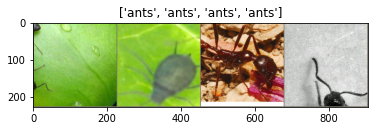

In [12]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [13]:
#training the mode

In [14]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

Visualise the model

In [15]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Finetuning the convnet

Load a pretrained model and reset final fully connected layer.

In [16]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


In [17]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.5516 Acc: 0.7049
val Loss: 0.2004 Acc: 0.9608

Epoch 1/24
----------
train Loss: 0.5007 Acc: 0.7746
val Loss: 0.4055 Acc: 0.8562

Epoch 2/24
----------
train Loss: 0.7085 Acc: 0.7254
val Loss: 0.2193 Acc: 0.9085

Epoch 3/24
----------
train Loss: 0.5412 Acc: 0.7910
val Loss: 0.2122 Acc: 0.9281

Epoch 4/24
----------
train Loss: 0.5130 Acc: 0.8115
val Loss: 0.2145 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.4615 Acc: 0.8238
val Loss: 0.3079 Acc: 0.8758

Epoch 6/24
----------
train Loss: 0.4385 Acc: 0.8156
val Loss: 0.2862 Acc: 0.9020

Epoch 7/24
----------
train Loss: 0.3186 Acc: 0.8566
val Loss: 0.2238 Acc: 0.9216

Epoch 8/24
----------
train Loss: 0.3427 Acc: 0.8770
val Loss: 0.2367 Acc: 0.9085

Epoch 9/24
----------
train Loss: 0.2774 Acc: 0.8811
val Loss: 0.2544 Acc: 0.9216

Epoch 10/24
----------
train Loss: 0.2522 Acc: 0.8934
val Loss: 0.2406 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.2622 Acc: 0.9139
val Loss: 0.2440 Acc: 0.9020

Epoch 12/24
----------
t

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


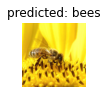

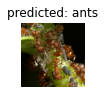

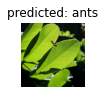

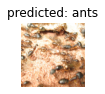

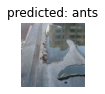

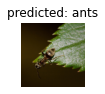

In [18]:
visualize_model(model_ft)

ConvNet as fixed feature extractor

In [19]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [20]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.9832 Acc: 0.5656
val Loss: 0.5644 Acc: 0.7647

Epoch 1/24
----------
train Loss: 0.6885 Acc: 0.7295
val Loss: 0.1686 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.5473 Acc: 0.7787
val Loss: 0.2557 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.4930 Acc: 0.7951
val Loss: 0.1519 Acc: 0.9608

Epoch 4/24
----------
train Loss: 0.4014 Acc: 0.8238
val Loss: 0.1676 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.3513 Acc: 0.8566
val Loss: 0.2663 Acc: 0.8954

Epoch 6/24
----------
train Loss: 0.5523 Acc: 0.7459
val Loss: 0.3094 Acc: 0.8824

Epoch 7/24
----------
train Loss: 0.5706 Acc: 0.7418
val Loss: 0.1871 Acc: 0.9542

Epoch 8/24
----------
train Loss: 0.4050 Acc: 0.7992
val Loss: 0.1957 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3988 Acc: 0.8361
val Loss: 0.1913 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.3631 Acc: 0.8361
val Loss: 0.1903 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.3908 Acc: 0.8238
val Loss: 0.1946 Acc: 0.9346

Epoch 12/24
----------
t

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


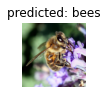

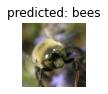

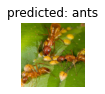

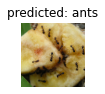

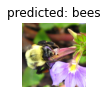

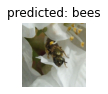

In [21]:
visualize_model(model_conv)

Face detection with prebuilt models in open-cv library

In [23]:
!pip install opencv-python


In [26]:
import urllib

url,filename = ("https://st.depositphotos.com/1033871/3026/i/950/depositphotos_30267145-stock-photo-smiling-faces.jpg","faces.jpg")

try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

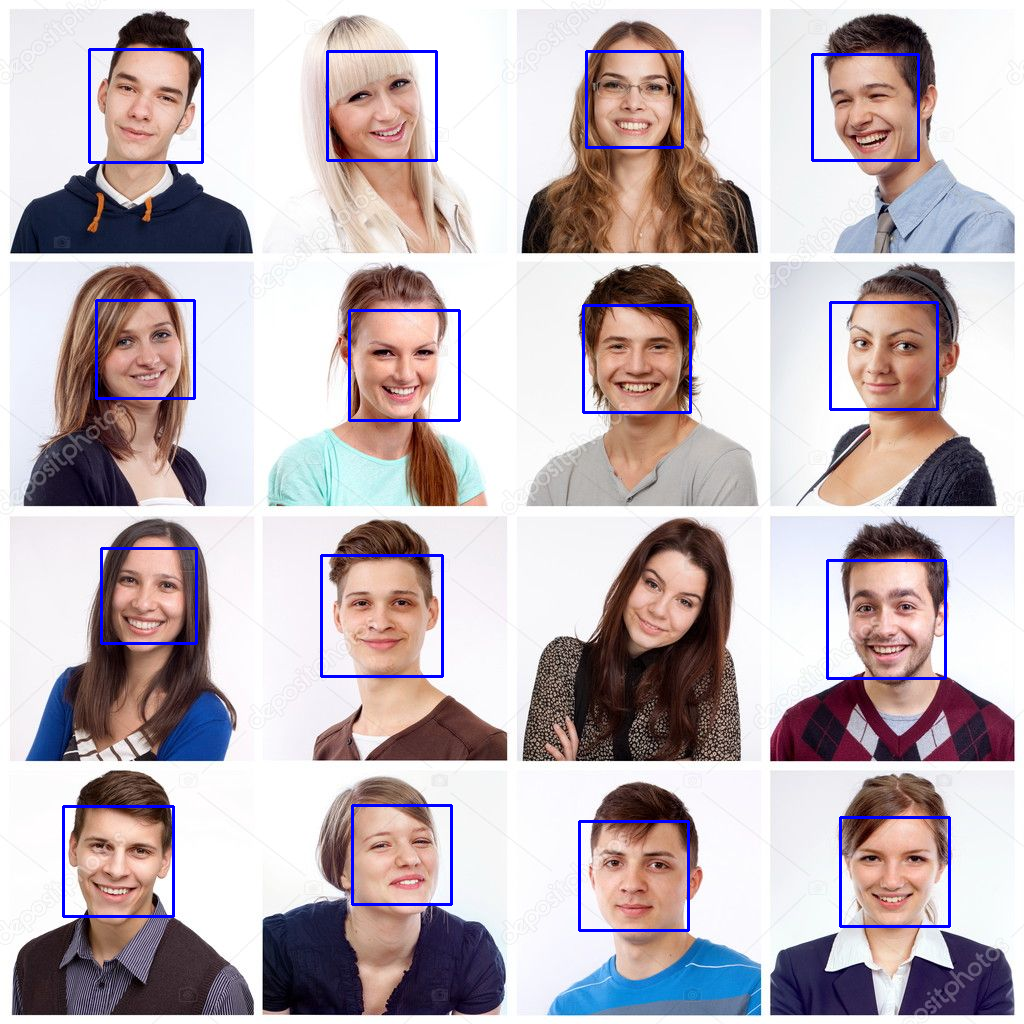

In [33]:
import cv2
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

image = cv2.imread('faces.jpg')
#LOAD TE GREY
grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(grey, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
cv2_imshow(image)



YOLO Version 5

In [34]:
#cloning yolov5 code from github
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 8754, done.
remote: Total 8754 (delta 0), reused 0 (delta 0), pack-reused 8754
Receiving objects: 100% (8754/8754), 9.33 MiB | 21.91 MiB/s, done.
Resolving deltas: 100% (6087/6087), done.


In [35]:
!cd yolov5

In [36]:
!pip install -r yolov5/requirements.txt

     |████████████████████████████████| 636 kB 12.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [39]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # or yolov5m, yolov5x, custom

# Images
img = 'https://ultralytics.com/images/zidane.jpg'  # or file, PIL, OpenCV, numpy, multiple

# Inference
results = model(filename) #File name loaded

# Results
results.print()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-8-10 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 



requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 
image 1/1: 1024x1024 16 persons, 2 ties
Speed: 33.6ms pre-process, 41.7ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)


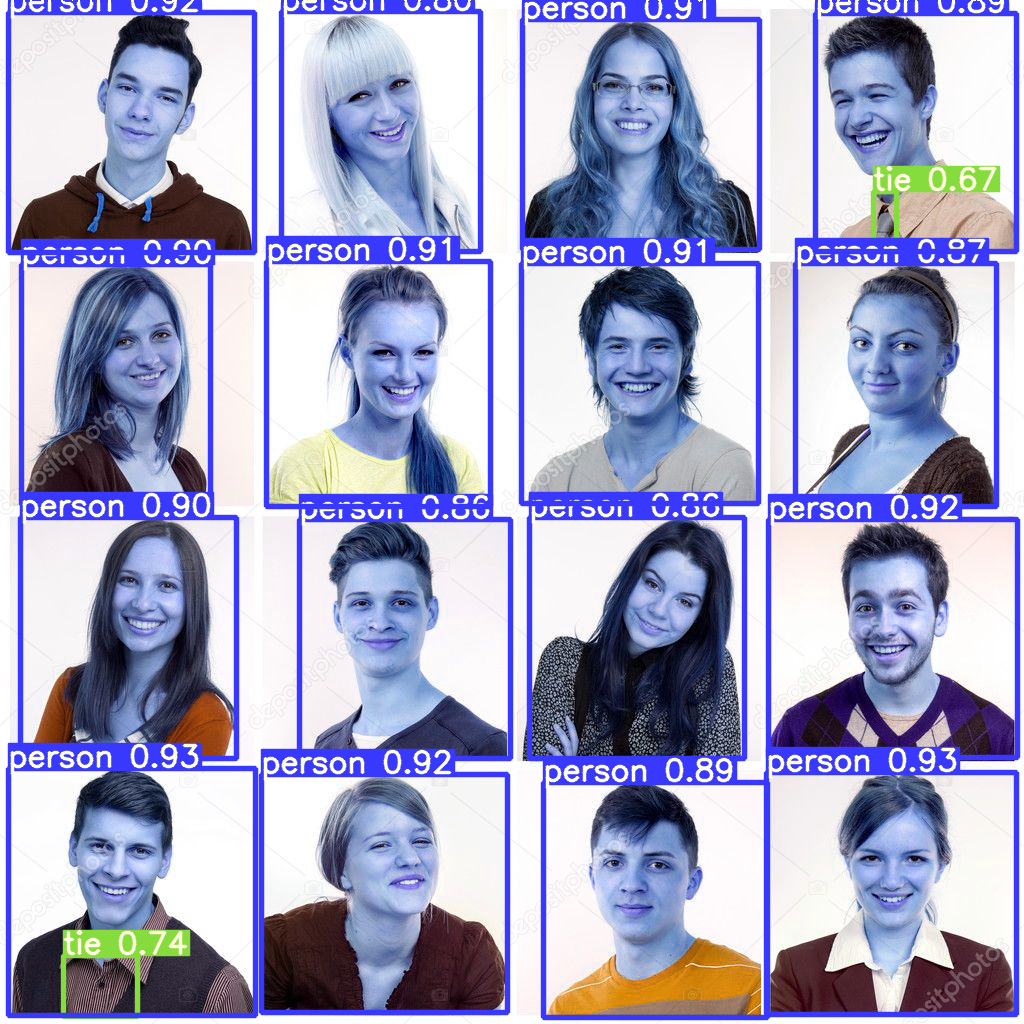

In [40]:
import cv2
from google.colab.patches import cv2_imshow
results.display(render=True)
cv2_imshow(results.imgs[0])

In [ ]:
#Here is a non-deep classifier to learn the hand-written data:

In [43]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test)= tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [44]:
x_train_short = x_train[0:1000,:,:]
y_train_short = y_train[0:1000]

In [50]:
import numpy as np
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train_short.reshape(1000,-1), y_train_short)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
clf.predict(x_test[0,:,:].reshape(1,-1))

array([7], dtype=uint8)

In [52]:
y_test[0]

7

In [53]:
from sklearn.cluster import KMeans
import numpy as np

In [54]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(x_train_short.reshape(1000,-1))
kmeans.labels_

array([8, 6, 1, 3, 2, 5, 4, 8, 4, 2, 8, 4, 8, 9, 4, 2, 5, 0, 4, 4, 1, 6, 2, 3, 4, 8, 1, 8, 2, 3, 4, 0, 9, 2, 6, 4, 9, 6, 1, 9, 4, 0, 4, 4, 4, 2, 1, 0, 4, 8, 8, 7, 1, 4, 2, 0, 7, 2, 1, 3, 1, 3, 9, 6, 1, 4, 9, 3, 7, 8, 4, 2, 4, 9, 8, 6, 4, 3, 3, 2, 8, 6, 5, 9, 2, 0, 4, 2, 7, 2, 9, 2, 1, 9, 0, 6, 2, 0, 8, 3, 4, 2, 4, 2,
       4, 3, 9, 8, 7, 4, 1, 8, 4, 3, 7, 2, 1, 8, 7, 6, 2, 7, 3, 2, 4, 0, 9, 2, 4, 9, 8, 2, 4, 2, 1, 8, 4, 0, 8, 2, 4, 3, 1, 1, 4, 4, 0, 9, 2, 8, 4, 9, 4, 2, 1, 9, 7, 8, 1, 5, 4, 8, 1, 3, 1, 9, 2, 2, 3, 6, 1, 5, 1, 4, 4, 4, 1, 3, 6, 8, 4, 2, 8, 2, 4, 2, 1, 8, 1, 4, 4, 4, 7, 2, 1, 2, 1, 0, 8, 1, 4, 3, 0, 0, 9, 3, 7, 2,
       4, 7, 7, 4, 4, 5, 1, 8, 1, 1, 9, 8, 5, 9, 1, 2, 0, 0, 1, 2, 1, 7, 2, 4, 1, 5, 7, 8, 0, 1, 9, 4, 4, 1, 8, 2, 8, 0, 7, 2, 4, 7, 1, 4, 4, 5, 8, 8, 3, 2, 2, 4, 4, 9, 4, 2, 1, 0, 8, 2, 4, 3, 4, 2, 1, 4, 4, 1, 4, 5, 9, 8, 2, 8, 1, 7, 8, 2, 9, 4, 2, 2, 3, 8, 4, 7, 1, 0, 7, 2, 8, 9, 3, 2, 9, 6, 1, 2, 7, 2, 5, 3, 4, 9,
       1, 2, 1, 3, 1, 5, 3, 2, 7, 8, 1, 9, 

In [55]:
#predict the values
kmeans.predict(x_train_short[0,:,:].reshape(1,-1))

array([8], dtype=int32)